In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import gmaps

# Import API key
from api_keys import g_key

In [130]:
# Study data files
Atl_2019_crime = "./Resources/2019_CrimeData_ATL.csv"
Atl_2020_crime = "./Resources/2020_Crime_Data_ATL.csv"
covid_data = "./Resources/Georgia_COVID-19 EDITED.csv"
unemployment = "./Resources/GAUR.csv"
crime_totals = "./Resources/Crime_Totals.csv"

In [131]:
crime_may2019 = pd.read_csv(Atl_2019_crime)
crime_may2019.head()

,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long
0,ROBBERY,191510360,5/31/2019,472 COURTLAND ST NE,509,Downtown,M,33.76763,-84.38419
1,ROBBERY,191511609,5/31/2019,2423 MARTIN L KING JR DR NW,108,Florida Heights,I,33.75183,-84.46623
2,ROBBERY,191511411,5/31/2019,1342 PRYOR RD SW,305,High Point,Y,33.71850,-84.39341
3,AGG ASSAULT,191510268,5/31/2019,151 CLEVELAND AVE SW,310,Browns Mill Park,Z,33.68148,-84.39422
4,AGG ASSAULT,191511544,5/31/2019,1083 EUCLID AVE NE,602,Inman Park,N,33.76323,-84.35155


In [132]:
crime_may2020 = pd.read_csv(Atl_2020_crime)
crime_may2020.head()

,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long
0,ROBBERY,201520053,5/31/2020,1362 BOULEVARD SE,607.0,Benteen Park,W,33.71744,-84.36818
1,LARCENY-FROM VEHICLE,201520174,5/31/2020,17 BAKER ST NE,509.0,Downtown,M,33.76215,-84.38675
2,BURGLARY,201520199,5/31/2020,1980 DELOWE DR SW,410.0,Campbellton Road,R,33.70106,-84.45698
3,LARCENY-FROM VEHICLE,201520274,5/31/2020,1754 RICHMOND CIR SE,307.0,Lakewood Heights,Y,33.70698,-84.37450
4,AGG ASSAULT,201520296,5/31/2020,991 STONEWALL DR SE,308.0,Leila Valley,Z,33.68995,-84.35680


In [133]:
# clean data
crime_2019_df = crime_may2019.loc[:, ["UC2_Literal","Neigborhood", "Report Date"]]
crime_2019_df.head()

,UC2_Literal,Neigborhood,Report Date
0,ROBBERY,Downtown,5/31/2019
1,ROBBERY,Florida Heights,5/31/2019
2,ROBBERY,High Point,5/31/2019
3,AGG ASSAULT,Browns Mill Park,5/31/2019
4,AGG ASSAULT,Inman Park,5/31/2019


In [134]:
# clean data
crime_2020_df = crime_may2020.loc[:, ["UC2_Literal","Neigborhood", "Report Date"]]
crime_2020_df.head()

,UC2_Literal,Neigborhood,Report Date
0,ROBBERY,Benteen Park,5/31/2020
1,LARCENY-FROM VEHICLE,Downtown,5/31/2020
2,BURGLARY,Campbellton Road,5/31/2020
3,LARCENY-FROM VEHICLE,Lakewood Heights,5/31/2020
4,AGG ASSAULT,Leila Valley,5/31/2020


In [135]:
crime_summary_data_2019 = crime_2019_df 
crime_group_by_neigborhood_2019 = crime_summary_data_2019.groupby(["Neigborhood"])
crime_temp_df_19 = crime_group_by_neigborhood_2019.count()
crime_temp_df_2019 = crime_temp_df_19.loc[:, ["UC2_Literal"]]
crime_temp_df_2019.rename(columns = {'UC2_Literal':'Crimes 2019'}, inplace = True) 
crime_temp_df_2019

,Crimes 2019
Neigborhood,
Adair Park,15
Adams Park,6
Adamsville,32
Almond Park,4
Amal Heights,1
...,...
Wildwood (NPU-H),3
Wilson Mill Meadows,3
Wisteria Gardens,2


In [136]:
crime_summary_data_2020 = crime_2020_df 
crime_group_by_neigborhood_2020 = crime_summary_data_2020.groupby(["Neigborhood"])
crime_temp_df_20 = crime_group_by_neigborhood_2020.count()
crime_temp_df_2020 = crime_temp_df_20.loc[:, ["UC2_Literal"]]
crime_temp_df_2020.rename(columns = {'UC2_Literal':'Crimes 2020'}, inplace = True) 
crime_temp_df_2020

,Crimes 2020
Neigborhood,
Adair Park,112
Adams Park,55
Adamsville,118
Almond Park,28
Ansley Park,28
...,...
Whittier Mill Village,7
Wildwood (NPU-C),56
Wilson Mill Meadows,7


In [137]:
# Merge two dataframes using an outer join
crime_19_20_df = pd.merge(crime_temp_df_2019, crime_temp_df_2020, on="Neigborhood", how="outer")
crime_19_20_df

,Crimes 2019,Crimes 2020
Neigborhood,,
Adair Park,15.0,112.0
Adams Park,6.0,55.0
Adamsville,32.0,118.0
Almond Park,4.0,28.0
Amal Heights,1.0,NaN
...,...,...
Ridgecrest Forest,NaN,7.0
Rue Royal,NaN,7.0
Springlake,NaN,7.0


In [138]:
# Delete N/A
crime_clear = crime_19_20_df.dropna(how='any')
crime_clear

,Crimes 2019,Crimes 2020
Neigborhood,,
Adair Park,15.0,112.0
Adams Park,6.0,55.0
Adamsville,32.0,118.0
Almond Park,4.0,28.0
Ansley Park,3.0,28.0
...,...,...
Whittier Mill Village,3.0,7.0
Wildwood (NPU-C),4.0,56.0
Wilson Mill Meadows,3.0,7.0


In [139]:
covid_df = pd.read_csv(covid_data)
covid_df.head()

,COUNTY,DATE STAMP,FEMALE,MALE,SEX UNKNOWN,SUM CASES
0,NON-GEORGIA RESIDENT,4/16/2020,220,222,69,511
1,NON-GEORGIA RESIDENT,4/17/2020,233,242,72,547
2,NON-GEORGIA RESIDENT,4/18/2020,237,246,77,560
3,NON-GEORGIA RESIDENT,4/19/2020,245,253,83,581
4,NON-GEORGIA RESIDENT,4/20/2020,254,261,91,606


In [140]:
# clean data
# rename colums
covid_2020_df = covid_df.loc[:, ["COUNTY","DATE STAMP", "SUM CASES"]]
covid_2020_df.rename(columns = {'COUNTY':'County','DATE STAMP': 'Report Date', 
                                'SUM CASES': 'Cases'}, inplace = True) 

covid_2020_df.head()

,County,Report Date,Cases
0,NON-GEORGIA RESIDENT,4/16/2020,511
1,NON-GEORGIA RESIDENT,4/17/2020,547
2,NON-GEORGIA RESIDENT,4/18/2020,560
3,NON-GEORGIA RESIDENT,4/19/2020,581
4,NON-GEORGIA RESIDENT,4/20/2020,606


In [141]:
unemployment = pd.read_csv(unemployment)
unemployment.head()

,Date,Unemployment %
0,1/1/19,3.8
1,2/1/19,3.7
2,3/1/19,3.7
3,4/1/19,3.6
4,5/1/19,3.6


In [142]:
crime_total = pd.read_csv(crime_totals)
crime_total.head()

,Date,Total crimes
0,1/1/19,2084
1,2/1/19,1642
2,3/1/19,1622
3,4/1/19,1845
4,5/1/19,2327


In [143]:
crime_vs_unemployment = pd.merge(unemployment, crime_total, on = "Date")

crime_vs_unemployment.head()

,Date,Unemployment %,Total crimes
0,1/1/19,3.8,2084
1,2/1/19,3.7,1642
2,3/1/19,3.7,1622
3,4/1/19,3.6,1845
4,5/1/19,3.6,2327


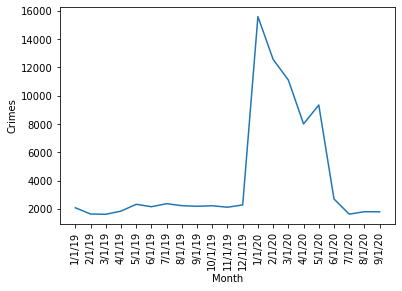

In [144]:
# Generate a scatter plot of date versus total crimes
date = crime_vs_unemployment.iloc[:,0]
crime = crime_vs_unemployment.iloc[:,2]
plt.plot(date,crime)
plt.xticks(date, rotation=90)
plt.xlabel('Month')
plt.ylabel('Crimes')
plt.show()
plt.close()

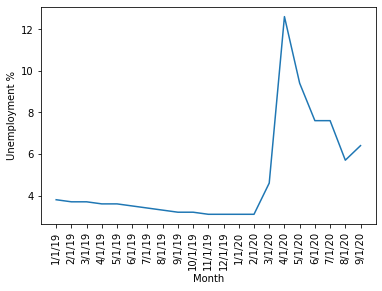

In [145]:
# Generate a scatter plot of date versus Unemployment
date2 = crime_vs_unemployment.iloc[:,0]
unemployment = crime_vs_unemployment.iloc[:,1]
plt.plot(date2,unemployment)
plt.xticks(date, rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment %')
plt.show()

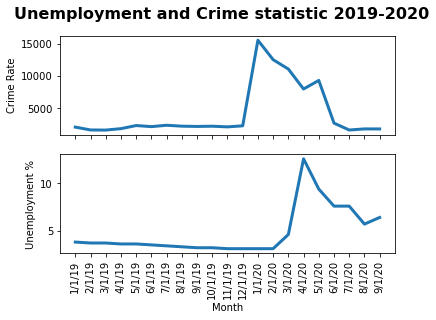

In [146]:
# Generate a facet plot of 2 figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Unemployment and Crime statistic 2019-2020", fontsize=16, fontweight="bold")

ax1.plot(date, crime, linewidth=1, color="c")
ax1.plot(date, crime, linewidth=3)
ax1.set_ylabel("Crime Rate")

ax2.plot(date, unemployment, linewidth=1, color="r")
ax2.plot(date, unemployment, linewidth=3)
ax2.set_ylabel("Unemployment %")
ax2.set_xlabel("Month")
plt.xticks(rotation=90)

plt.show()

In [147]:
### Zone Data and Analysis 

In [148]:
#Take in data and read csv files

#May 2019
zone1_may2019 = "Resources/raw_zones_data/zone1_may2019.csv"
zone2_may2019 = "Resources/raw_zones_data/zone2_may2019.csv"
zone3_may2019 = "Resources/raw_zones_data/zone3_may2019.csv"
zone4_may2019 = "Resources/raw_zones_data/zone4_may2019.csv"
zone5_may2019 = "Resources/raw_zones_data/zone5_may2019.csv"
zone6_may2019 = "Resources/raw_zones_data/zone6_may2019.csv"


#Read May 2019 Data File and store into Pandas DataFrames
zone1_may2019 = pd.read_csv(zone1_may2019)
zone2_may2019 = pd.read_csv(zone2_may2019)
zone3_may2019 = pd.read_csv(zone3_may2019)
zone4_may2019 = pd.read_csv(zone4_may2019)
zone5_may2019 = pd.read_csv(zone5_may2019)
zone6_may2019 = pd.read_csv(zone6_may2019)

zone1_may2019.head()

,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long,Unnamed: 9
0,ROBBERY,191511609,05/31/2019,2423 MARTIN L KING JR DR NW,108,Florida Heights,I,33.75183,-84.46623,NaN
1,BURGLARY,191511253,05/31/2019,2031 CHICAGO AVE NW,107,Grove Park,J,33.76485,-84.45386,NaN
2,LARCENY-NON VEHICLE,191512118,05/31/2019,2045 DONALD LEE HOLLOWELL PKWY NW,107,Grove Park,J,33.77740,-84.45214,NaN
3,LARCENY-FROM VEHICLE,191510677,05/31/2019,3123 ELEANOR TER NW,112,Collier Heights,I,33.77746,-84.48870,NaN
4,LARCENY-FROM VEHICLE,191510516,05/31/2019,2707 DONALD LEE HOLLOWELL PKWY NW,113,Brookview Heights,G,33.77774,-84.47583,NaN


In [149]:
#groupby 2019 crime type
#zone1
zone1_2019 = zone1_may2019[['UC2_Literal']]
zone1_crime_type_2019 = zone1_may2019.groupby(['UC2_Literal'])
zone1_total_crimes = zone1_crime_type_2019['Report Number'].count()

#zone2
zone2_2019 = zone2_may2019[['UC2_Literal']]
zone2_crime_type_2019 = zone2_may2019.groupby(['UC2_Literal'])
zone2_total_crimes = zone2_crime_type_2019['Report Number'].count()

#zone3
zone3_2019 = zone3_may2019[['UC2_Literal']]
zone3_crime_type_2019 = zone3_may2019.groupby(['UC2_Literal'])
zone3_total_crimes = zone3_crime_type_2019['Report Number'].count()

#zone4
zone4_2019 = zone4_may2019[['UC2_Literal']]
zone4_crime_type_2019 = zone4_may2019.groupby(['UC2_Literal'])
zone4_total_crimes = zone4_crime_type_2019['Report Number'].count()

#zone5
zone5_2019 = zone5_may2019[['UC2_Literal']]
zone5_crime_type_2019 = zone5_may2019.groupby(['UC2_Literal'])
zone5_total_crimes = zone5_crime_type_2019['Report Number'].count()

#zone6
zone6_2019 = zone6_may2019[['UC2_Literal']]
zone6_crime_type_2019 = zone6_may2019.groupby(['UC2_Literal'])
zone6_total_crimes = zone6_crime_type_2019['Report Number'].count()

#test print to confirm
zone6_total_crimes

UC2_Literal
AGG ASSAULT              18
AUTO THEFT               49
BURGLARY                 37
HOMICIDE                  1
LARCENY-FROM VEHICLE    199
LARCENY-NON VEHICLE     129
ROBBERY                  12
Name: Report Number, dtype: int64

In [150]:
#Creating a new DF with all zones for 2019
all_zones_2019 = pd.DataFrame ({"Zone1_19": zone1_total_crimes,
                               "Zone2_19": zone2_total_crimes,
                               "Zone3_19": zone3_total_crimes,
                               "Zone3_19": zone3_total_crimes,
                               "Zone4_19": zone4_total_crimes,
                               "Zone5_19": zone5_total_crimes,
                               "Zone6_19": zone6_total_crimes})

all_zones_2019.index.name = "Crime Type"

#remove NaN
all_zones_2019['Zone5_19']=all_zones_2019['Zone5_19'].fillna(0)

all_zones_2019

,Zone1_19,Zone2_19,Zone3_19,Zone4_19,Zone5_19,Zone6_19
Crime Type,,,,,,
AGG ASSAULT,53,16,54,46,34.0,18
AUTO THEFT,39,53,47,57,41.0,49
BURGLARY,54,41,68,63,21.0,37
HOMICIDE,2,2,1,2,0.0,1
LARCENY-FROM VEHICLE,113,159,79,94,214.0,199
LARCENY-NON VEHICLE,74,132,63,53,102.0,129
ROBBERY,38,9,8,21,20.0,12


In [151]:
#Take in data and read csv files

#May 2020
zone1_may2020 = "Resources/raw_zones_data/zone1_may2020.csv"
zone2_may2020 = "Resources/raw_zones_data/zone2_may2020.csv"
zone3_may2020 = "Resources/raw_zones_data/zone3_may2020.csv"
zone4_may2020 = "Resources/raw_zones_data/zone4_may2020.csv"
zone5_may2020 = "Resources/raw_zones_data/zone5_may2020.csv"
zone6_may2020 = "Resources/raw_zones_data/zone6_may2020.csv"


#Read May 2019 Data File and store into Pandas DataFrames
zone1_may2020 = pd.read_csv(zone1_may2020)
zone2_may2020 = pd.read_csv(zone2_may2020)
zone3_may2020 = pd.read_csv(zone3_may2020)
zone4_may2020 = pd.read_csv(zone4_may2020)
zone5_may2020 = pd.read_csv(zone5_may2020)
zone6_may2020 = pd.read_csv(zone6_may2020)

#zone1_may2020

In [152]:
#groupby 2020 crime type
#zone1
zone1_2020 = zone1_may2020[['UC2_Literal']]
zone1_crime_type_2020 = zone1_may2020.groupby(['UC2_Literal'])
zone1_total_crimes = zone1_crime_type_2020['Report Number'].count()

#zone2
zone2_2020 = zone2_may2020[['UC2_Literal']]
zone2_crime_type_2020 = zone2_may2020.groupby(['UC2_Literal'])
zone2_total_crimes = zone2_crime_type_2020['Report Number'].count()

#zone3
zone3_2020 = zone3_may2020[['UC2_Literal']]
zone3_crime_type_2020 = zone3_may2020.groupby(['UC2_Literal'])
zone3_total_crimes = zone3_crime_type_2020['Report Number'].count()

#zone4
zone4_2020 = zone4_may2020[['UC2_Literal']]
zone4_crime_type_2020 = zone4_may2020.groupby(['UC2_Literal'])
zone4_total_crimes = zone4_crime_type_2020['Report Number'].count()

#zone5
zone5_2020 = zone5_may2020[['UC2_Literal']]
zone5_crime_type_2020 = zone5_may2020.groupby(['UC2_Literal'])
zone5_total_crimes = zone5_crime_type_2020['Report Number'].count()

#zone6
zone6_2020 = zone6_may2020[['UC2_Literal']]
zone6_crime_type_2020 = zone6_may2020.groupby(['UC2_Literal'])
zone6_total_crimes = zone6_crime_type_2020['Report Number'].count()

#test print to confirm
zone6_total_crimes

UC2_Literal
AGG ASSAULT             111
AUTO THEFT              298
BURGLARY                125
LARCENY-FROM VEHICLE    385
LARCENY-NON VEHICLE     602
ROBBERY                  49
Name: Report Number, dtype: int64

In [153]:
#Creating a new DF with all zones for 2020
all_zones_2020 = pd.DataFrame ({"Zone1_20": zone1_total_crimes,
                               "Zone2_20": zone2_total_crimes,
                               "Zone3_20": zone3_total_crimes,
                               "Zone3_20": zone3_total_crimes,
                               "Zone4_20": zone4_total_crimes,
                               "Zone5_20": zone5_total_crimes,
                               "Zone6_20": zone6_total_crimes})

all_zones_2020.index.name = "Crime Type"

#remove NaN
all_zones_2020['Zone6_20']=all_zones_2020['Zone6_20'].fillna(0)

all_zones_2020.reset_index()

all_zones_2020

,Zone1_20,Zone2_20,Zone3_20,Zone4_20,Zone5_20,Zone6_20
Crime Type,,,,,,
AGG ASSAULT,390,118,340,350,230,111.0
AUTO THEFT,147,174,183,187,206,298.0
BURGLARY,174,581,307,267,278,125.0
HOMICIDE,7,7,7,27,7,0.0
LARCENY-FROM VEHICLE,210,387,321,328,497,385.0
LARCENY-NON VEHICLE,305,230,278,360,470,602.0
ROBBERY,62,55,71,83,91,49.0


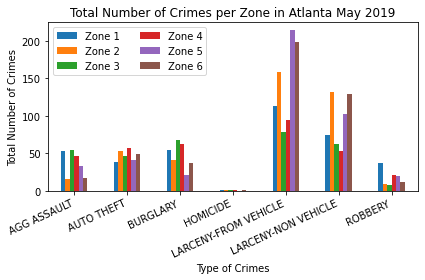

In [154]:
#Bar chart with zones May 2019
zones_may2019_chart = all_zones_2019.plot(kind='bar', rot=25)

#labels
zones_may2019_chart.set_xlabel("Type of Crimes")
zones_may2019_chart.set_ylabel("Total Number of Crimes")
zones_may2019_chart.set_title("Total Number of Crimes per Zone in Atlanta May 2019")

plt.tight_layout()
plt.gca().legend(["Zone 1", "Zone 2", "Zone 3", "Zone 4", "Zone 5", "Zone 6"],ncol =2);

plt.xticks(ha='right')

plt.show()

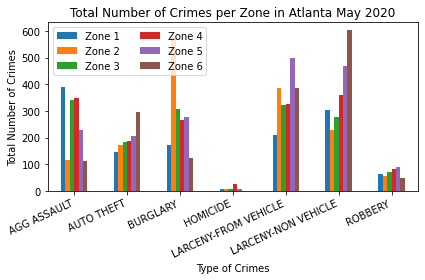

In [155]:
#Bar chart with zones May 2020
zones_may2020_chart = all_zones_2020.plot(kind='bar', rot=25, legend=False)

#labels
zones_may2020_chart.set_xlabel("Type of Crimes")
zones_may2020_chart.set_ylabel("Total Number of Crimes")
zones_may2020_chart.set_title("Total Number of Crimes per Zone in Atlanta May 2020")

plt.tight_layout()
plt.gca().legend(["Zone 1", "Zone 2", "Zone 3", "Zone 4", "Zone 5", "Zone 6"],ncol =2);

plt.xticks(ha='right')

plt.show()

In [156]:
#combine May 2019 and May 2020 datasets for all zones
allzones_May2019_20 = pd.merge(all_zones_2019, all_zones_2020, how="outer", on=["Crime Type"])

allzones_May2019_20

,Zone1_19,Zone2_19,Zone3_19,Zone4_19,Zone5_19,Zone6_19,Zone1_20,Zone2_20,Zone3_20,Zone4_20,Zone5_20,Zone6_20
Crime Type,,,,,,,,,,,,
AGG ASSAULT,53,16,54,46,34.0,18,390,118,340,350,230,111.0
AUTO THEFT,39,53,47,57,41.0,49,147,174,183,187,206,298.0
BURGLARY,54,41,68,63,21.0,37,174,581,307,267,278,125.0
HOMICIDE,2,2,1,2,0.0,1,7,7,7,27,7,0.0
LARCENY-FROM VEHICLE,113,159,79,94,214.0,199,210,387,321,328,497,385.0
LARCENY-NON VEHICLE,74,132,63,53,102.0,129,305,230,278,360,470,602.0
ROBBERY,38,9,8,21,20.0,12,62,55,71,83,91,49.0


In [157]:
crime_diff = allzones_May2019_20

#Number of increase
zone1 = (crime_diff['Zone1_20']-crime_diff['Zone1_19'])
zone2 = (crime_diff['Zone2_20']-crime_diff['Zone2_19'])
zone3 = (crime_diff['Zone3_20']-crime_diff['Zone3_19'])
zone4 = (crime_diff['Zone4_20']-crime_diff['Zone4_19'])
zone5 = (crime_diff['Zone5_20']-crime_diff['Zone5_19'])
zone6 = (crime_diff['Zone6_20']-crime_diff['Zone6_19'])

crime_diff = pd.DataFrame ({"Zone 1":zone1,
                          "Zone 2":zone2,
                          "Zone 3":zone3,
                          "Zone 4":zone4,
                          "Zone 5":zone5,
                          "Zone 6":zone6})

crime_diff.index.name = "Crime Type"
crime_diff

,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6
Crime Type,,,,,,
AGG ASSAULT,337,102,286,304,196.0,93.0
AUTO THEFT,108,121,136,130,165.0,249.0
BURGLARY,120,540,239,204,257.0,88.0
HOMICIDE,5,5,6,25,7.0,-1.0
LARCENY-FROM VEHICLE,97,228,242,234,283.0,186.0
LARCENY-NON VEHICLE,231,98,215,307,368.0,473.0
ROBBERY,24,46,63,62,71.0,37.0


In [158]:
#remove Homicide
crime_diff = crime_diff.drop('HOMICIDE')
crime_diff

,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6
Crime Type,,,,,,
AGG ASSAULT,337,102,286,304,196.0,93.0
AUTO THEFT,108,121,136,130,165.0,249.0
BURGLARY,120,540,239,204,257.0,88.0
LARCENY-FROM VEHICLE,97,228,242,234,283.0,186.0
LARCENY-NON VEHICLE,231,98,215,307,368.0,473.0
ROBBERY,24,46,63,62,71.0,37.0


In [159]:
#switching DF to foucus on zones and pie chart percent increase

zones_df = pd.DataFrame(dict(
        Zones='Zone 1; Zone 2; Zone 3; Zone 4; Zone 5; Zone 6'.split(';'),
        Agg_Assault=[337,102,286,304,196,93],
        Auto_Theft=[108,121,136,130,165,249],
        Burglary=[120,540,239,204,257,88],
        Larceny_Vehicle=[97,228,242,234,283,186],
        Larceny_NonVehicle=[231,98,215,307,368,473],
        Robbery=[24,46,63,62,71,37]))
                     
zones_df

,Zones,Agg_Assault,Auto_Theft,Burglary,Larceny_Vehicle,Larceny_NonVehicle,Robbery
0,Zone 1,337,108,120,97,231,24
1,Zone 2,102,121,540,228,98,46
2,Zone 3,286,136,239,242,215,63
3,Zone 4,304,130,204,234,307,62
4,Zone 5,196,165,257,283,368,71
5,Zone 6,93,249,88,186,473,37


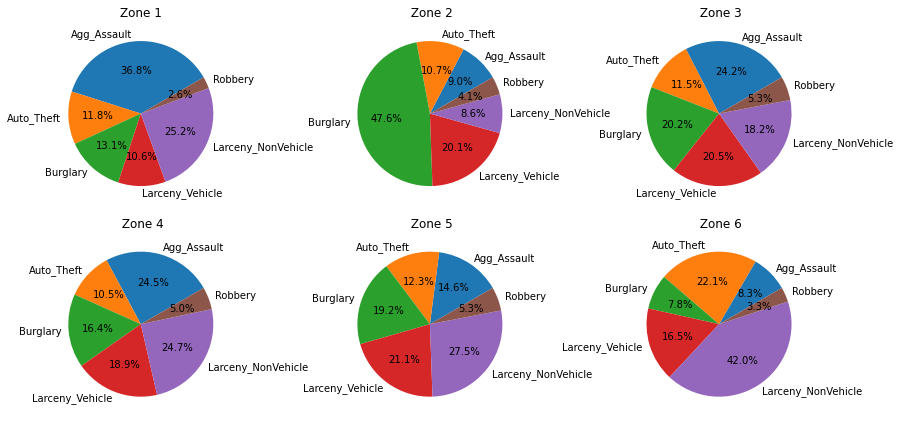

In [160]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

explode = (0.2, 0, 0, 0, 0, 0)

for i, (idx, row) in enumerate(zones_df.set_index('Zones').iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, autopct='%1.1f%%')
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

plt.tight_layout()

In [161]:
#Top crimes of May 2019 and May 2020 (total count & overall percentage) - Patrice

#Group by each type of crime and get the number of each crime commited in May 2019 
top_crime_2019 = crime_2019_df.groupby("UC2_Literal").count()["Report Date"]
top_crime_2019

UC2_Literal
AGG ASSAULT             222
AUTO THEFT              286
BURGLARY                284
HOMICIDE                  8
LARCENY-FROM VEHICLE    859
LARCENY-NON VEHICLE     559
ROBBERY                 109
Name: Report Date, dtype: int64

In [162]:
#Group by each type of crime and get the number of each crime commited in May 2020

top_crime_2020 = crime_2020_df.groupby("UC2_Literal").count()["Report Date"]
top_crime_2020

UC2_Literal
AGG ASSAULT             1539
AUTO THEFT              1208
BURGLARY                1732
HOMICIDE                  55
LARCENY-FROM VEHICLE    2140
LARCENY-NON VEHICLE     2259
ROBBERY                  411
Name: Report Date, dtype: int64

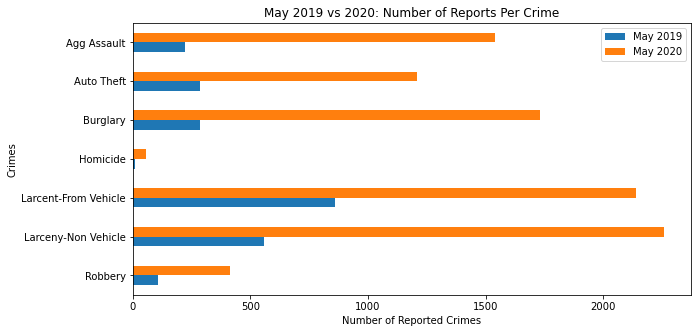

In [163]:
#Total Count
plotdata = pd.DataFrame({
    "May 2019":[109,559,859,8,284,286,222],
    "May 2020":[411,2259,2140,55,1732,1208,1539]}, 
    index=["Robbery", "Larceny-Non Vehicle", "Larcent-From Vehicle", "Homicide",
           "Burglary", "Auto Theft", "Agg Assault"]
)
plotdata.plot(kind="barh", figsize=(10,5))
plt.title("May 2019 vs 2020: Number of Reports Per Crime")
plt.xlabel("Number of Reported Crimes")
plt.ylabel("Crimes")

plt.show()

In [164]:
#Top Crimes in 2019 vs 2020

top_2019 = pd.DataFrame(crime_2019_df.groupby(["UC2_Literal"]).count()).reset_index()
top_2019 = top_2019[["UC2_Literal","Report Date"]]
top_2019 = top_2019.rename({"UC2_Literal":"Crimes", "Report Date":"Number of Reports"}, axis=1) 
top_2019 = top_2019.sort_values(by = ['Number of Reports'],ascending = [False])
top_2019 = top_2019.rename_axis('Top Five Crimes of May 2019')
top_2019.reset_index(inplace=True)
top_2019

,Top Five Crimes of May 2019,Crimes,Number of Reports
0,4,LARCENY-FROM VEHICLE,859
1,5,LARCENY-NON VEHICLE,559
2,1,AUTO THEFT,286
3,2,BURGLARY,284
4,0,AGG ASSAULT,222
5,6,ROBBERY,109
6,3,HOMICIDE,8


In [165]:
top_2020 = pd.DataFrame(crime_2020_df.groupby(["UC2_Literal"]).count()).reset_index()
top_2020 = top_2020[["UC2_Literal","Report Date"]]
top_2020 = top_2020.rename({"UC2_Literal":"Crimes", "Report Date":"Number of Reports"}, axis=1)
top_2020 = top_2020.sort_values(by = ['Number of Reports'],ascending=[False])
top_2020 = top_2020.rename_axis('Top Five Crimes of May 2020')
top_2020.reset_index(inplace=True)
top_2020

,Top Five Crimes of May 2020,Crimes,Number of Reports
0,5,LARCENY-NON VEHICLE,2259
1,4,LARCENY-FROM VEHICLE,2140
2,2,BURGLARY,1732
3,0,AGG ASSAULT,1539
4,1,AUTO THEFT,1208
5,6,ROBBERY,411
6,3,HOMICIDE,55


Text(0, 0.5, 'Percentage Per Crime by Overall Total')

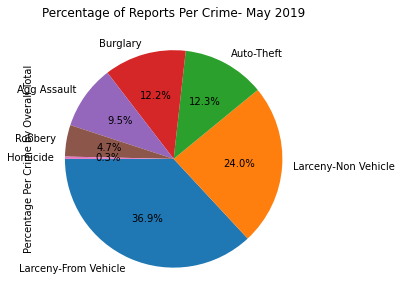

In [166]:
#Overall Percentage for May 2019/2020

plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, aspect='equal')
crime_pie_2019 = top_2019.plot(kind="pie", y="Number of Reports",ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=["Larceny-From Vehicle", "Larceny-Non Vehicle", "Auto-Theft", "Burglary",
           "Agg Assault", "Robbery", "Homicide"], legend = False, fontsize=10)
crime_pie_2019
plt.title("Percentage of Reports Per Crime- May 2019")
plt.ylabel("Percentage Per Crime by Overall Total")

Text(0, 0.5, 'Percentage Per Crime by Overall Total')

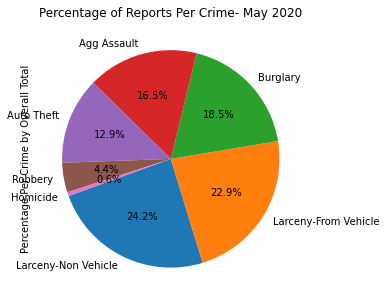

In [167]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, aspect='equal')
crime_pie_2020 = top_2020.plot(kind="pie", y="Number of Reports",ax=ax1, autopct='%1.1f%%', 
 startangle=200, shadow=False, labels=["Larceny-Non Vehicle", "Larceny-From Vehicle", "Burglary", "Agg Assault",
           "Auto Theft", "Robbery", "Homicide"], legend = False, fontsize=10)
crime_pie_2020
plt.title("Percentage of Reports Per Crime- May 2020")
plt.ylabel("Percentage Per Crime by Overall Total")

In [168]:
covid_df = pd.read_csv(covid_data)
covid_df

,COUNTY,DATE STAMP,FEMALE,MALE,SEX UNKNOWN,SUM CASES
0,NON-GEORGIA RESIDENT,4/16/2020,220,222,69,511
1,NON-GEORGIA RESIDENT,4/17/2020,233,242,72,547
2,NON-GEORGIA RESIDENT,4/18/2020,237,246,77,560
3,NON-GEORGIA RESIDENT,4/19/2020,245,253,83,581
4,NON-GEORGIA RESIDENT,4/20/2020,254,261,91,606
...,...,...,...,...,...,...
47613,WALKER,9/1/2020,615,602,22,1239
47614,WALKER,9/2/2020,630,610,22,1262
47615,WALKER,9/3/2020,646,618,22,1286
47616,WALKER,9/4/2020,655,629,23,1307


In [169]:
covid_count_county_df = covid_df.loc[covid_df['COUNTY'] == 'FULTON']
covid_count_county_df['DATE STAMP'] = pd.to_datetime(covid_count_county_df['DATE STAMP'])
covid_count_county_df

/Users/roman/opt/anaconda3/envs/PyData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,COUNTY,DATE STAMP,FEMALE,MALE,SEX UNKNOWN,SUM CASES
3812,FULTON,2020-01-01,0,0,0,0
3813,FULTON,2020-01-02,0,0,0,0
3814,FULTON,2020-01-03,0,0,0,0
3815,FULTON,2020-01-04,0,0,0,0
3816,FULTON,2020-01-05,0,0,0,0
...,...,...,...,...,...,...
4102,FULTON,2020-10-16,15219,13882,844,29945
4103,FULTON,2020-10-17,15235,13904,845,29984
4104,FULTON,2020-10-18,15241,13907,845,29993
4105,FULTON,2020-10-19,15242,13907,845,29994


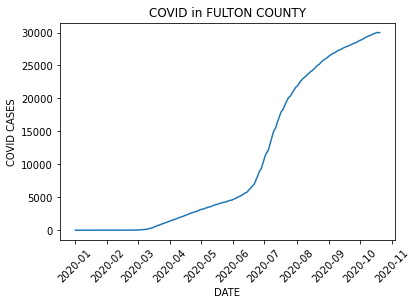

In [170]:
plt.plot(covid_count_county_df['DATE STAMP'], covid_count_county_df['SUM CASES'])
plt.xlabel("DATE")
plt.ylabel("COVID CASES")
plt.title("COVID in FULTON COUNTY")
plt.xticks(rotation=45)
plt.show()

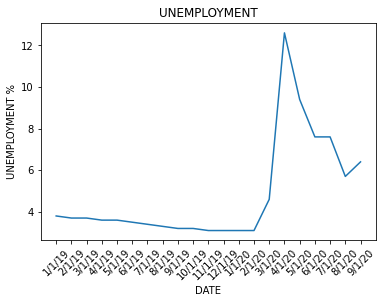

In [171]:
date2 = crime_vs_unemployment.iloc[:,0]
unemployment = crime_vs_unemployment.iloc[:,1]
plt.plot(date2,unemployment)
plt.xticks(date, rotation=45)
plt.xlabel('DATE')
plt.ylabel('UNEMPLOYMENT %')
plt.title("UNEMPLOYMENT")
plt.show()

In [184]:
locations_2019 = crime_may2019[["Lat", "Long"]]
locations_2020 = crime_may2020[["Lat", "Long"]]

rprt_num = crime_may2019["Report Number"].astype(float)

In [185]:
fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(locations_2019,
                                   dissipating=False, max_intensity=16,
                                   point_radius=.01)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [186]:
fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(locations_2020,
                                   dissipating=False, max_intensity=16,
                                   point_radius=.01)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [187]:
locations = crime_may2019[["Lat", "Long"]]

rprt_num = crime_may2019["Report Number"].astype(float)

fig = gmaps.figure()

crime_layer = gmaps.heatmap_layer(locations,
                                   dissipating=False, max_intensity=3,
                                   point_radius=0.01)

markers = gmaps.marker_layer(locations)
fig.add_layer(markers)
fig.add_layer(crime_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [188]:
ga_counties = [
    {'name': 'Gwinnett', 'location': (33.919, -84.016), 'un_rate': 9.5},
    {'name': 'Fulton', 'location': (33.803, -84.396), 'un_rate':  7.1},
    {'name': 'Dekalb', 'location': (33.796, -84.228), 'un_rate': 9.20},
    {'name': 'Cobb', 'location': (33.899, -84.564), 'un_rate': 8.60},
    {'name': 'Pickens', 'location': (33.899, -84.564), 'un_rate': 7.10},
    {'name': 'Hall', 'location': (34.307, -83.804), 'un_rate': 7.60},
    {'name': 'Walton', 'location': (33.770, -83.719), 'un_rate': 10.90},
    {'name': 'Bartow', 'location': (34.266, -84.815), 'un_rate': 9.40},
    {'name': 'Fayette', 'location': (33.450, -84.480), 'un_rate': 8.40},
    {'name': 'Bartow', 'location': (34.266, -84.815), 'un_rate': 9.40},
]

county_locations = [county['location'] for county in ga_counties]
info_box_template = """
<dl>
<dt>County Name</dt><dd>{name}</dd>
<dt>Unemployment Rate (2020)</dt><dd>{un_rate}</dd>
</dl>
"""
county_info = [info_box_template.format(**county) for county in ga_counties]

marker_layer = gmaps.marker_layer(county_locations, info_box_content=county_info)
fig = gmaps.figure()
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [189]:
ga20_counties = [
    {'name': 'Gwinnett', 'location': (33.919, -84.016), 'un_rate': 9.5},
    {'name': 'Fulton', 'location': (33.803, -84.396), 'un_rate':  7.1},
    {'name': 'Dekalb', 'location': (33.796, -84.228), 'un_rate': 9.20},
    {'name': 'Cobb', 'location': (33.899, -84.564), 'un_rate': 8.60},
    {'name': 'Pickens', 'location': (33.899, -84.564), 'un_rate': 7.10},
    {'name': 'Hall', 'location': (34.307, -83.804), 'un_rate': 7.60},
    {'name': 'Walton', 'location': (33.770, -83.719), 'un_rate': 10.90},
    {'name': 'Bartow', 'location': (34.266, -84.815), 'un_rate': 9.40},
    {'name': 'Fayette', 'location': (33.450, -84.480), 'un_rate': 8.40},
    {'name': 'Bartow', 'location': (34.266, -84.815), 'un_rate': 9.40},
    {'name': 'Clayton', 'location': (33.557, -84.375), 'un_rate': 13.80},
]

county_locations = [county['location'] for county in ga20_counties]
info_box_template = """
<dl>
<dt>County Name</dt><dd>{name}</dd>
<dt>Unemployment Rate (May of 2020)</dt><dd>{un_rate}</dd>
</dl>
"""
county_info = [info_box_template.format(**county) for county in ga20_counties]

marker_layer = gmaps.marker_layer(county_locations, info_box_content=county_info)
#fig = gmaps.figure()
#fig.add_layer(marker_layer)

heatmap_layer = gmaps.heatmap_layer(locations_2020,
                                   dissipating=False, max_intensity=16,
                                   point_radius=.01)
fig = gmaps.figure()
fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)


fig

Figure(layout=FigureLayout(height='420px'))

In [190]:
ga19_counties = [
    {'name': 'Gwinnett', 'location': (33.919, -84.016), 'un_rate': 2.9},
    {'name': 'Fulton', 'location': (33.803, -84.396), 'un_rate':  3.80},
    {'name': 'Dekalb', 'location': (33.796, -84.228), 'un_rate': 2.80},
    {'name': 'Cobb', 'location': (33.899, -84.564), 'un_rate': 3.20},
    {'name': 'Pickens', 'location': (33.899, -84.564), 'un_rate': 3.00},
    {'name': 'Hall', 'location': (34.307, -83.804), 'un_rate': 2.80},
    {'name': 'Walton', 'location': (33.770, -83.719), 'un_rate': 3.00},
    {'name': 'Bartow', 'location': (34.266, -84.815), 'un_rate': 3.10},
    {'name': 'Fayette', 'location': (33.450, -84.480), 'un_rate': 3.00},
    {'name': 'Bartow', 'location': (34.266, -84.815), 'un_rate': 3.10},
    {'name': 'Clayton', 'location': (33.557, -84.375), 'un_rate': 4.10},
]

county_locations = [county['location'] for county in ga19_counties]
info_box_template = """
<dl>
<dt>County Name</dt><dd>{name}</dd>
<dt>Unemployment Rate (May of 2019)</dt><dd>{un_rate}</dd>
</dl>
"""
county_info = [info_box_template.format(**county) for county in ga19_counties]

marker_layer = gmaps.marker_layer(county_locations, info_box_content=county_info)
#fig = gmaps.figure()
#fig.add_layer(marker_layer)

heatmap_layer = gmaps.heatmap_layer(locations_2019,
                                   dissipating=False, max_intensity=16,
                                   point_radius=.01)
fig = gmaps.figure()
fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)


fig

Figure(layout=FigureLayout(height='420px'))